# Uczenie Nienadzorowane – Redukcja Wymiarowości (PCA, LDA, t-SNE)

&#x20;

## Wprowadzenie

Wysoka liczba cech (wymiarów) w danych może powodować szereg problemów: od zwiększonej złożoności obliczeniowej, poprzez trudności w wizualizacji, aż po zjawisko *przekleństwa wymiarowości* (ang. *curse of dimensionality*). **Redukcja wymiarowości** to proces przekształcania danych do przestrzeni o mniejszej liczbie wymiarów, przy zachowaniu jak największej ilości istotnych informacji.

![What is Curse of Dimensionality ?| Machine Learning #2 | by Gökçenaz Akyol  | Medium](https://miro.medium.com/v2/resize:fit:1400/1*2_IV9Mg3rDmzL3ssCnW0UA.png "What is Curse of Dimensionality ?| Machine Learning #2 | by Gökçenaz Akyol  | Medium")

![The Curse of Dimensionality in Classification](https://www.visiondummy.com/wp-content/uploads/2014/04/sparseness.png "The Curse of Dimensionality in Classification")



Skupimy się na trzech popularnych metodach redukcji wymiarowości:

* **PCA (Principal Component Analysis)** – analiza głównych składowych (metoda nienadzorowana, liniowa).
* **LDA (Linear Discriminant Analysis)** – liniowa analiza dyskryminacyjna (metoda nadzorowana – wykorzystuje etykiety klas – również liniowa).
* **t-SNE (t-distributed Stochastic Neighbor Embedding)** – stochastyczne sąsiedztwo rozkładu t (metoda nieliniowa, głównie do wizualizacji).




***

## PCA – Analiza Głównych Składowych

### 1.1 Teoria PCA (Principal Component Analysis)

**PCA (Principal Component Analysis)** to nienadzorowana metoda redukcji wymiarowości, której celem jest znalezienie nowych wymiarów (tzw. **składowych głównych**), będących liniowymi kombinacjami oryginalnych cech, w taki sposób, aby **maksymalizować wariancję danych** na tych wymiarach. Pierwsza składowa główna to kierunek w przestrzeni cech, wzdłuż którego dane mają największą wariancję. Druga składowa to kierunek ortogonalny do pierwszej, wzdłuż którego pozostająca (niewyjaśniona) wariancja jest największa, i tak dalej.


Kluczowe właściwości PCA:

* **Liniowość:** PCA dokonuje rotacji układu współrzędnych do nowej bazy wektorów własnych (eigenwektorów) macierzy kowariancji danych. Nowe cechy (składowe główne) są kombinacją liniową oryginalnych cech.
* **Nienadzorowana:** PCA nie wykorzystuje żadnych informacji o etykietach czy grupach – kierunki maksymalnej wariancji wyznaczane są wyłącznie na podstawie struktury danych.
* **Wariancja wyjaśniona:** Każda składowa główna ma odpowiadającą jej wartość własną, związaną z częścią całkowitej wariancji danych, jaką ta składowa tłumaczy. Sumaryczna wariancja wyjaśniona przez pierwsze *k* składowych informuje nas, jaka część informacji (wariancji) została zachowana, redukując dane do *k* wymiarów.
* **Ortogonalność składowych:** Składowe główne są wzajemnie ortogonalne (nie skorelowane), co upraszcza strukturę danych i eliminuje redundancję informacji wynikającą z korelacji cech oryginalnych.
* **Skalowanie danych:** Przed zastosowaniem PCA zazwyczaj **standaryzujemy cechy** (np. do średniej 0 i odch. std 1), ponieważ PCA jest wrażliwe na skale cech. Cecha o większej wariancji (np. mierzonej w większych jednostkach) zdominuje pierwszą składową kosztem innych, jeśli nie przeskalujemy danych.

![](https://machinelearningcoban.com/assets/27_pca/pca_procedure.png)




**Zastosowania PCA:** redukcja szumu (dzięki odrzuceniu mniej istotnych składowych), kompresja danych (możemy przechować mniej wymiarów z niewielką utratą informacji), wizualizacja danych wielowymiarowych na wykresach 2D/3D, przyspieszenie działania innych algorytmów (poprzez redukcję liczby wymiarów wejściowych).


### 1.2 Przykład: PCA na zbiorze Iris

Zaczniemy od klasycznego zbioru **Iris** z biblioteki `sklearn.datasets`. Zbiór Iris zawiera 150 próbek kwiatów z 3 gatunków irysów (*setosa*, *versicolor*, *virginica*), opisanych czterema cechami (długość i szerokość działki kielicha oraz płatka). Zredukujemy wymiarowość z 4 do 2 za pomocą PCA i zobaczymy, jak dane rozkładają się na płaszczyźnie dwóch głównych składowych.



**Kroki:**

1. Wczytanie danych Iris.
2. Standaryzacja cech.
3. Dopasowanie PCA z 2 składowymi i przekształcenie danych.
4. Wizualizacja wyników na wykresie 2D, gdzie punkty oznaczają próbki, a kolory odpowiadają gatunkom.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Wczytanie zbioru danych Iris
iris = load_iris()
X = iris.data            # macierz cech o wymiarach 150x4
y = iris.target          # wektor etykiet gatunków (0,1,2)
target_names = iris.target_names  # nazwy gatunków

# 2. Standaryzacja cech (średnia=0, std=1)
X_std = StandardScaler().fit_transform(X)

# 3. PCA z dwoma składowymi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [2]:

print("Wariancja wyjaśniona przez 2 składowe:", pca.explained_variance_ratio_.sum())


Wariancja wyjaśniona przez 2 składowe: 0.9581320720000166


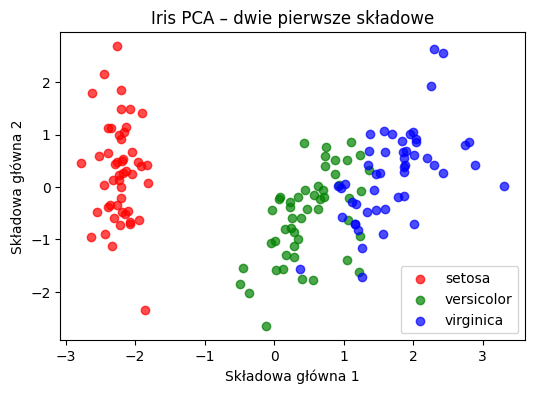

In [3]:


# 4. Wykres danych w przestrzeni dwóch pierwszych składowych
colors = ['red', 'green', 'blue']
plt.figure(figsize=(6,4))
for target, color in zip([0, 1, 2], colors):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1],
                label=target_names[target], color=color, alpha=0.7)
plt.xlabel('Składowa główna 1')
plt.ylabel('Składowa główna 2')
plt.title('Iris PCA – dwie pierwsze składowe')
plt.legend()
plt.show()



Powyższy kod wyświetla wykres punktowy próbek Iris w nowej przestrzeni dwóch wymiarów (PC1 vs PC2). Zobaczmy rezultat:

*Wykres: Projekcja danych Iris na dwie pierwsze składowe główne (PCA 2D). Każdy punkt to próbka kwiatu; kolor oznacza gatunek: czerwony – setosa, zielony – versicolor, niebieski – virginica.* Pierwsza składowa PCA oddziela wyraźnie **Iris setosa** (czerwone punkty po lewej) od pozostałych dwóch gatunków. Dwie pozostałe odmiany (zielone i niebieskie) nie są całkowicie rozdzielone – ich punkty częściowo na siebie nachodzą. Mimo to, widać pewną strukturę: *Iris versicolor* i *Iris virginica* układają się wzdłuż ciągłego przejścia, co odpowiada temu, że te dwa gatunki są bardziej podobne do siebie niż do *setosy*. Warto zauważyć, że **dwie składowe PCA zachowały około 95,8% całkowitej wariancji danych** (sumę wariancji wyjaśnionej wypisaliśmy w konsoli, a także możemy ją obliczyć sumując `pca.explained_variance_ratio_`). Oznacza to, że redukując 4-wymiarowe dane do 2 wymiarów, zachowaliśmy prawie całą informację statystyczną – co pozwala na efektywną wizualizację bez znacznej utraty informacji.


**Uwaga:** Ponieważ PCA znajduje kierunki największej wariancji, a *Iris setosa* różni się wyraźnie od dwóch pozostałych gatunków (np. ma znacznie mniejsze płatki), pierwszy komponent w dużej mierze koduje różnicę *setosa vs reszta*. Drugi komponent przejmuje to, czego pierwszy nie uchwycił – zapewne różnicuje *versicolor* vs *virginica*, choć te różnice mają mniejszą wariancję globalnie, stąd częściowe nakładanie się klas.


### 1.3 PCA – ile składowych zachować? (Przykład na zbiorze Digits)




W praktyce, często musimy zdecydować, **ile składowych PCA** należy zachować, by zredukować wymiarowość, ale nie zgubić zbyt wiele informacji. Do tego celu służy miara **wariancji wyjaśnionej**. Przyjrzyjmy się temu na przykładzie nieco bardziej złożonego zbioru danych – **Digits** (również dostępnego w `sklearn.datasets`). Zbiór Digits zawiera 1797 próbek ręcznie pisanych cyfr 0–9, przy czym każda próbka to obrazek 8x8 pikseli (64 cechy pikselo-wejściowe). Mamy tu zatem **64-wymiarową** przestrzeń cech.

Wykonamy PCA na zbiorze Digits i sprawdzimy, jak kumulatywnie rośnie odsetek wyjaśnionej wariancji wraz ze zwiększaniem liczby składowych. W szczególności, znajdziemy minimalną liczbę składowych potrzebną do wyjaśnienia 90% wariancji danych. Dodatkowo, zobrazujemy, jak wyglądają dane Digits zredukowane do 2 wymiarów za pomocą PCA (choć intuicyjnie można się spodziewać, że 2 składowe mogą nie wystarczyć do rozdzielenia 10 różnych klas cyfr).

In [5]:

from sklearn.datasets import load_digits

# Wczytanie danych Digits (1797 próbek, 64 cechy)
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Standaryzacja cech (opcjonalnie - tutaj wszystkie cechy (piksele) są w tym samym zakresie 0-16,
# więc skalowanie nie wpłynie na relacje między nimi, ale wykonujemy dla nawyku)
X_digits_std = StandardScaler().fit_transform(X_digits)


In [6]:

# Dopasowanie PCA na pełnym wymiarze (64) w celu analizy wariancji
pca_full = PCA(n_components=64)
X_digits_pca = pca_full.fit_transform(X_digits_std)
variance_ratios = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratios)

In [7]:

# Ile składowych potrzeba do wyjaśnienia co najmniej 90% wariancji?
k90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Liczba składowych dla >=90% wariancji: {k90}")
print(f"Wariancja wyjaśniona przez {k90} składowych: {cumulative_variance[k90-1]*100:.1f}%")

Liczba składowych dla >=90% wariancji: 31
Wariancja wyjaśniona przez 31 składowych: 90.0%


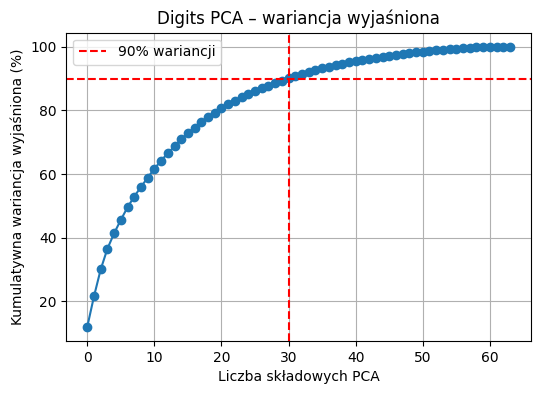

In [8]:



# Wykres: kumulatywna wariancja wyjaśniona vs liczba składowych
plt.figure(figsize=(6,4))
plt.plot(cumulative_variance * 100, marker='o')
plt.axhline(90, color='r', linestyle='--', label='90% wariancji')
plt.axvline(k90-1, color='r', linestyle='--')
plt.xlabel('Liczba składowych PCA')
plt.ylabel('Kumulatywna wariancja wyjaśniona (%)')
plt.title('Digits PCA – wariancja wyjaśniona')
plt.legend()
plt.grid(True)
plt.show()

*Wykres: Kumulatywna wariancja wyjaśniona przez składowe PCA dla zbioru Digits. Czerwona linia przerywana wskazuje poziom 90% wyjaśnionej wariancji.* Na powyższym wykresie widzimy, że aby zachować 90% informacji ze zbioru **Digits**, potrzeba około **31 składowych głównych** (na wykresie zaznaczono punkt przecięcia z linią 90%). Pełny 64-wymiarowy zbiór oczywiście wyjaśnia 100% wariancji (na końcu wykresu), ale widać wyraźnie zjawisko **wygasania wartości dodanej kolejnych składowych** – pierwsze kilka składowych dodaje dużo (krzywa rośnie stromo), późniejsze składowe wnoszą coraz mniej (wypłaszczenie krzywej). Dzięki takiej analizie możemy podjąć decyzję, ile składowych wybrać, aby osiągnąć zadowalający kompromis między redukcją wymiaru a zachowaniem informacji (np. 95% wariancji, 99%, itp., w zależności od potrzeb).


Teraz zobaczmy, jak wyglądają dane Digits zrzutowane na 2 składowe PCA. Narysujemy wykres podobny do tego dla Iris, z tą różnicą, że teraz mamy 10 różnych klas (cyfr 0–9), zaznaczymy je kolorami i dodamy kolorbar zamiast legendy (dla czytelności przy tylu klasach).


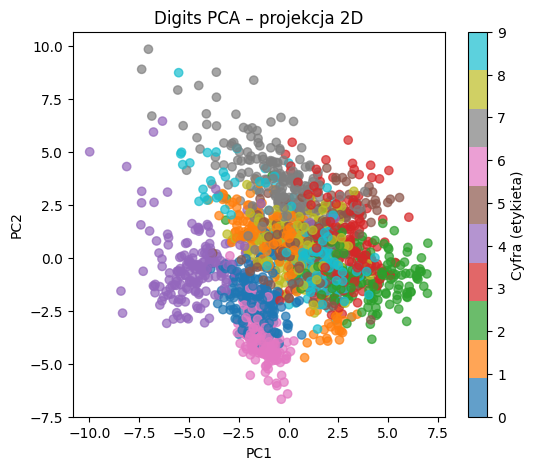

In [9]:
# PCA na 2 składowe dla Digits
pca2 = PCA(n_components=2)
X_digits_2D = pca2.fit_transform(X_digits_std)

plt.figure(figsize=(6,5))
scatter = plt.scatter(X_digits_2D[:, 0], X_digits_2D[:, 1], c=y_digits, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label="Cyfra (etykieta)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Digits PCA – projekcja 2D")
plt.show()




*Wykres: Projekcja PCA (2 składowe) dla zbioru Digits. Każdy punkt to obraz cyfry 8x8, kolory oznaczają rzeczywiste cyfry 0–9.* Jak widać, w przestrzeni 2 głównych składowych **klastry odpowiadające poszczególnym cyfrom nakładają się na siebie** – szczególnie cyfry takie jak *4* (pomarańczowe punkty), *9* (turkusowe) czy *7* (czarne) są rozproszone i mieszają się z innymi. Pewne cyfry tworzą wyraźniejsze grupy (np. czerwone punkty **0** są skupione po prawej dole, fioletowe **3** i żółte **8** również tworzą własne skupiska), ale generalnie PCA zredukowało 64-wymiarowe dane do 2D **kosztem utraty informacji, która była istotna do rozróżnienia wszystkich 10 klas**. To oczywiście oczekiwane: zachowaliśmy tylko \~**55% wariancji** (sprawdź: sum(variance\_ratios\[:2]) ), co oznacza znaczną utratę danych. Niemniej jednak, PCA umożliwiła kompresję danych – jeśli naszym celem byłoby np. przyspieszenie klasyfikatora, moglibyśmy zachować więcej komponentów (np. 30 dla 90% wariancji) i trenować model na zredukowanych danych.

**Podsumowanie PCA:** PCA to potężna technika do liniowej redukcji wymiarów. Działa najlepiej, gdy największa część informacji w danych jest związana z wariancją wzdłuż pewnych kierunków (np. cechy są skorelowane, pewne kombinacje cech wyjaśniają większość zmienności). Warto pamiętać o skalowaniu danych przed PCA oraz o analizie wariancji wyjaśnionej w celu wyboru liczby komponentów. PCA nie wykorzystuje żadnych informacji o etykietach – jest metodą czysto nienadzorowaną, więc **nie gwarantuje, że zachowa struktury związane z klasami** (jak widzieliśmy na przykładzie cyfr).

### 1.4 Ćwiczenia do samodzielnego wykonania (PCA)

1. **PCA na innym zbiorze danych:** Wykonaj PCA dla innego zestawu danych dostępnego w bibliotece `sklearn.datasets`. Możesz spróbować klasycznego zbioru **Wine** (chemiczne pomiary próbek wina, 13 cech, 3 klasy) lub **Breast Cancer** (30 cech, 2 klasy). Zredukuj wymiar do 2 i narysuj wykres punktowy z kolorami odpowiadającymi klasom (o ile dane mają etykiety). Zaobserwuj, jak rozkładają się dane w przestrzeni głównych składowych – czy klasy są rozdzielone? które składowe (cechy) wydają się najważniejsze?

   *Wskazówka:* Skorzystaj z kodu powyżej jako szablonu. Pamiętaj o standaryzacji cech. Zwróć uwagę na `explained_variance_ratio_` – ile wariancji zachowałeś w 2D?



2. **Wybór liczby składowych:** Dla wybranego przez Ciebie zbioru danych policz i narysuj wykres kumulatywnej wariancji wyjaśnionej (podobny do powyższego dla Digits). Określ minimalną liczbę składowych potrzebną do zachowania, powiedzmy, 95% wariancji. Czy redukcja do tylu wymiarów stanowi dużą oszczędność w porównaniu z oryginalną liczbą cech?


3. **Wpływ skalowania:** Przetestuj działanie PCA na nieskalowanych danych vs. po standaryzacji. Na przykład, weź zbiór **Wine** i wykonaj PCA na surowych cechach, a osobno na cechach przeskalowanych do tego samego zakresu. Porównaj wynikowe wariancje wyjaśnione i może wizualizacje 2D. *Czy różnica jest zauważalna?* (Podpowiedź: cechy w zbiorze Wine mają różne skale – np. `alcohol` jest podawany w procentach, `proline` w mg/l – co może skutkować zdominowaniem PCA przez cechę o największej wariancji absolutnej, jeśli nie przeskalujemy danych.)




4. **PCA dla danych tekstowych lub innych nietypowych:** Jeśli czujesz się pewnie, spróbuj zastosować PCA do nietypowego rodzaju danych. Na przykład, weź zbiór dokumentów tekstowych (możesz użyć `sklearn.datasets.fetch_20newsgroups` do pobrania tekstów z 20 Newsgroups), przekształć teksty na wektory TF-IDF za pomocą `TfidfVectorizer` (co da wysokowymiarową reprezentację, rzędu tysięcy cech), a następnie użyj PCA do redukcji wymiarowości. Sprawdź, ile komponentów potrzeba, by wyjaśnić sensowną część wariancji. Możesz też spróbować zwizualizować dokumenty w 2D (kolorując punkty według kategorii tekstów) – czy zaobserwujesz grupowanie się dokumentów o podobnej tematyce? *(To ćwiczenie jest bardziej zaawansowane i może wymagać sporo mocy obliczeniowej przy dużej liczbie dokumentów – ewentualnie ogranicz się do mniejszej próbki tekstów lub mniejszej liczby cech).*

##  LDA – Liniowa Analiza Dyskryminacyjna

### 2.1 Teoria LDA (Linear Discriminant Analysis)

**LDA (Linear Discriminant Analysis)** to technika redukcji wymiarowości **wykorzystująca informację o klasach** (czyli jest metodą nadzorowaną). Celem LDA jest znalezienie takich kombinacji cech (liniowych), które **maksymalizują separację między z góry znanymi klasami**. W praktyce, LDA szuka osi (wektorów) w przestrzeni cech, wzdłuż których **różne klasy mają jak najbardziej różne średnie, a jednocześnie wariancja (rozrzut) w obrębie każdej klasy jest jak najmniejsza**. Innymi słowy, LDA stara się **maksymalizować stosunek wariancji między-klasowej do wariancji wewnątrz-klasowej**.

![](https://miro.medium.com/v2/resize:fit:1400/0*mZ7Lk6MPxWj629ae)



Najważniejsze aspekty LDA:

* **Wykorzystanie etykiet:** W przeciwieństwie do PCA, LDA *wie*, które próbki należą do jakich klas. To oznacza, że **LDA jest metodą nadzorowaną** – kierunki optymalnych rzutów danych zależą od rozkładu klas.
* **Maksymalna liczba komponentów:** LDA może wyznaczyć co najwyżej *(C-1)* składowych (zwanych czasem *liniowymi dyskryminantami*), gdzie C to liczba klas. Dla przykładu, jeśli mamy 3 klasy, LDA znajdzie maksymalnie 2 niezależne kierunki, wzdłuż których dane są rozdzielane. Dzieje się tak, ponieważ przy C klasach przestrzeń między-klasowa jest napięta co najwyżej do wymiaru C-1.
* **LDA a klasyfikacja:** LDA pierwotnie zostało wprowadzone jako technika do celów klasyfikacji – po znalezieniu liniowych kombinacji cech separujących klasy, można dokonać klasyfikacji poprzez rzutowanie danych na te kombinacje i ustawienie progów decyzyjnych. Jednak w niniejszym kursie skupiamy się na aspekcie redukcji wymiarów i wizualizacji – można stosować LDA, by zobaczyć dane w przestrzeni o wymiarach 1, 2 lub więcej, gdzie separacja klas jest maksymalna.
* **Założenia:** Klasyczny model LDA zakłada, że klasy po zrzutowaniu na znalezione kierunki mają rozkład normalny (gaussowski) ze wspólną kowariancją (różnią się tylko średnie). W praktyce, nawet jeśli to założenie nie jest idealnie spełnione, LDA często dobrze radzi sobie z separacją, o ile klasy są w miarę linearnie rozdzielne.
* **Porównanie z PCA:** PCA ignoruje etykiety i może wybierać kierunki, które nie są użyteczne do odróżnienia klas. LDA celowo wybiera kierunki **najlepsze do odróżnienia znanych klas** – stąd zazwyczaj, jeśli dane mają wyraźne klasy, LDA dostarczy przestrzeni o niższym wymiarze, gdzie klasy są lepiej rozdzielone niż na przestrzeni PCA o tym samym wymiarze.


### 2.2 Przykład: LDA na zbiorze Wine (porównanie z PCA)

Aby zilustrować działanie LDA, użyjemy zbioru **Wine** – jest to zbiór wyników chemicznych analiz pewnych win (ze szczepu hodowanego we Włoszech), gdzie każda próbka wina należy do jednej z **trzech odmian** (klas). Oryginalne cechy to 13 różnych pomiarów chemicznych. Celem będzie zredukowanie wymiaru do 2 i sprawdzenie, czy trzy odmiany win są od siebie oddzielone. Ponieważ mamy 3 klasy, LDA może znaleźć maksymalnie 2 dyskryminanty – idealnie do wizualizacji 2D.

Dla porównania, wykonamy również PCA na te same dane (do 2 wymiarów) – zobaczymy różnicę między podejściem nadzorowanym (LDA) a nienadzorowanym (PCA).


**Kroki:**

1. Wczytanie zbioru Wine.
2. Standaryzacja cech.
3. Dopasowanie LDA (2 komponenty) i transformacja danych.
4. Dopasowanie PCA (2 komponenty) dla tych samych danych.
5. Wizualizacja: wykresy 2D wyników PCA i LDA obok siebie.


Klasy (odmiany wina): ['class_0' 'class_1' 'class_2']


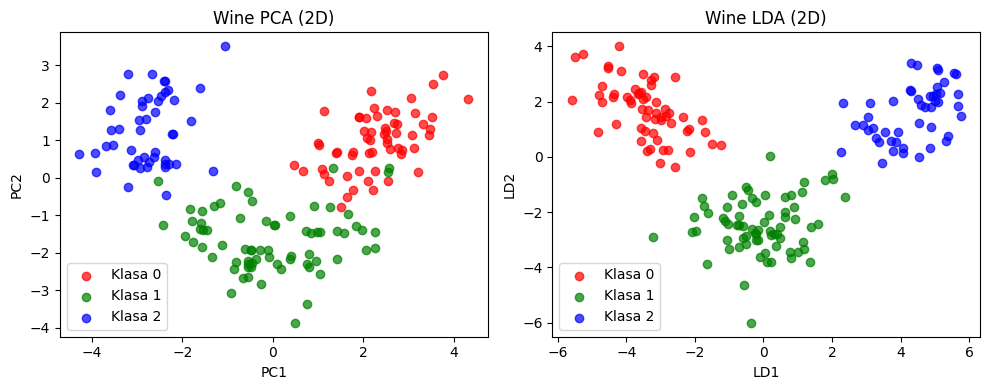

In [10]:
from sklearn.datasets import load_wine
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 1. Wczytanie danych Wine
wine = load_wine()
X_wine = wine.data
y_wine = wine.target
print("Klasy (odmiany wina):", wine.target_names)  # sprawdźmy nazwy klas

# 2. Standaryzacja cech
X_wine_std = StandardScaler().fit_transform(X_wine)

# 3. LDA (2 komponenty)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda_2D = lda.fit_transform(X_wine_std, y_wine)

# 4. PCA (2 komponenty) na tych samych danych dla porównania
pca = PCA(n_components=2)
X_pca_2D = pca.fit_transform(X_wine_std)

# 5. Wykres porównawczy PCA vs LDA
plt.figure(figsize=(10,4))
# PCA subplot
plt.subplot(1, 2, 1)
for cls, color in zip([0,1,2], ['red','green','blue']):
    plt.scatter(X_pca_2D[y_wine == cls, 0], X_pca_2D[y_wine == cls, 1],
                label=f"Klasa {cls}", color=color, alpha=0.7)
plt.title("Wine PCA (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
# LDA subplot
plt.subplot(1, 2, 2)
for cls, color in zip([0,1,2], ['red','green','blue']):
    plt.scatter(X_lda_2D[y_wine == cls, 0], X_lda_2D[y_wine == cls, 1],
                label=f"Klasa {cls}", color=color, alpha=0.7)
plt.title("Wine LDA (2D)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.tight_layout()
plt.show()


*Wykres: Porównanie PCA vs LDA na zbiorze Wine. Lewy panel: dwie główne składowe PCA; prawy panel: dwie składowe/dyskryminanty LDA.* W powyższej wizualizacji widzimy wyraźną różnicę: **LDA (po prawej) znacznie lepiej rozdziela trzy klasy wina** niż PCA (po lewej). W przestrzeni PCA klasy częściowo na siebie zachodzą – szczególnie klasy 0 (czerwone) i 1 (zielone) są wymieszane. Natomiast w przestrzeni LDA te trzy grupy są odseparowane: klasa 0 (czerwone punkty) skupiona jest u góry wykresu, klasa 1 (zielone) niżej po lewej, a klasa 2 (niebieskie) po prawej. To dlatego, że LDA **wykorzystała etykiety** i znalazła kierunki maksymalnie różnicujące te trzy odmiany wina.



Warto zauważyć, że LDA osiągnęła tę separację, mimo że redukcja wymiaru była bardzo duża (z 13D do 2D). Oczywiście, LDA „wiedząc” które próbki należą do której klasy, mogła zignorować wariancję nieistotną z punktu widzenia różnic między klasami, a skupić się na tych kombinacjach cech, które różnią klasy. W przypadku PCA, pierwsze składowe mogły uchwycić dużą wariancję np. w stężeniach pewnych składników chemicznych, ale jeśli ta wariancja nie pokrywała się z podziałem na klasy, to w przestrzeni PCA klasy nie będą rozdzielone.



**Interpretacja komponentów LDA:** W przeciwieństwie do PCA, komponenty LDA nie maksymalizują „wariancji ogólnej”, więc nie interpretujemy ich w kategoriach odsetka wyjaśnionej wariancji danych ogółem. Można natomiast myśleć o nich jak o kombinacjach cech najbardziej różnicujących klasy. W powyższym przykładzie np. LD1 (pierwsza składowa LDA) to zapewne kombinacja cech odpowiadająca pewnemu „wymiarowi smaku”, który najlepiej odróżnia klasę 2 od (0,1), zaś LD2 różnicuje klasę 0 od 1. W praktyce, dla trzech klas, 2 pierwsze dyskryminanty wystarczą do pełnej separacji (co widzimy na wykresie).



### 2.3 Inne zastosowania i uwagi do LDA

* **Klasy binarne:** W przypadku gdy mamy tylko dwie klasy, LDA znajdzie tylko **jedną** składową (C-1 = 1). Możemy wtedy zredukować wymiar danych do 1 i np. zobaczyć histogram wartości tej składowej dla obu klas. W idealnym przypadku (doskonała separacja) histogramy nie będą na siebie nachodzić.
* **Wysokie wymiary vs. liczba próbek:** LDA wymaga obliczenia macierzy kowariancji (wewnątrz-klasowej). Gdy liczba cech jest zbliżona do liczby próbek lub większa, macierz ta może być osobliwa (nieodwracalna). W takich sytuacjach stosuje się *regularized LDA* lub PCA wstępnie (np. obniżyć wymiar PCA, a potem LDA). Na poziomie tego kursu nie wchodzimy w te szczegóły – warto jednak o tym wiedzieć przy bardzo wysokowymiarowych danych.

* **Kontrast z** ***Latent Dirichlet Allocation*****:** Należy wspomnieć, że skrót LDA bywa też używany dla zupełnie innej metody – *Latent Dirichlet Allocation*, która dotyczy modelowania tematów w zbiorze dokumentów (to również metoda nienadzorowana, ale nie związana z niniejszym tematem). W naszym kursie przez LDA rozumiemy wyłącznie *Linear Discriminant Analysis*. W języku polskim czasem na ten drugi LDA mówi się „ukryta alokacja Dirichlet’a”, więc nie powinno być pomyłki.



* **Wykorzystanie LDA jako klasyfikatora:** Po wyznaczeniu dyskryminant LDA możemy przekształcić dane i np. zastosować prosty klasyfikator (jak regresja logistyczna lub nawet najbliższy sąsiad) w tej zredukowanej przestrzeni – często daje to dobre wyniki, gdyż LDA to w istocie optymalna redukcja pod dany klasyfikator Bayesowski. W scikit-learn `LinearDiscriminantAnalysis` może służyć zarówno do transformacji (metoda `transform`), jak i bezpośrednio do predykcji klas (metoda `predict`), jeśli użyjemy go jak klasyfikatora.



### 2.4 Ćwiczenia do samodzielnego wykonania (LDA)

1. **Porównanie LDA i PCA na innym zbiorze:** Podobnie jak zrobiliśmy to dla Wine, wybierz zbiór danych z kilkoma klasami i porównaj projekcje PCA vs LDA. Dobrym kandydatem jest wcześniej wspomniany zbiór **Iris** (3 klasy). Wykonaj PCA (2D) i LDA (2D) na danych Iris i porównaj, jak układają się trzy gatunki kwiatów. Która metoda daje lepszą separację gatunków? *(Oczekujesz, że LDA, ponieważ zna klasy – sprawdź jak duża jest różnica.)*



2. **LDA dla danych binarnych:** Spróbuj zastosować LDA do zbioru danych z dwiema klasami, np. **Breast Cancer** (gdzie klasy to nowotwór złośliwy vs łagodny). Ponieważ C=2, LDA zwróci tylko 1 składową. Możesz przedstawić wynik na wykresie np. w postaci dwóch nakładających się histogramów – jeden dla wartości tej składowej dla klasy 0, drugi dla klasy 1. Czy przedziały tych histogramów są rozłączne (co oznaczałoby idealną separację)? Czy może częściowo się pokrywają? Jak to się ma do jakości klasyfikacji?



3. **Zastosowanie LDA do wysokowymiarowych danych:** Jeśli masz dostęp do jakiegoś zbioru z dużą liczbą cech i znanymi klasami (np. danych genetycznych: ekspresji genów dla różnych typów próbek, gdzie cech (genów) jest bardzo dużo w porównaniu do próbek), spróbuj zastosować LDA. Zwróć jednak uwagę na problem wspomniany wcześniej – w bardzo wysokim wymiarze LDA może wymagać regularzacji. Ewentualnie, zastosuj najpierw PCA do zmniejszenia wymiaru, a następnie LDA. Jest to też popularne podejście: **PCA + LDA**.

4. **Klasyfikacja po LDA:** (Opcjonalne, wykracza poza temat wizualizacji) Podziel zbiór danych na część uczącą i testową. Dopasuj LDA na części uczącej, przetransformuj dane do przestrzeni o mniejszym wymiarze, a następnie trenuj prosty klasyfikator (np. `LogisticRegression` lub `KNeighborsClassifier`) na tych zredukowanych danych. Oceń dokładność na zbiorze testowym. Czy klasyfikator na przestrzeni LDA radzi sobie porównywalnie do klasyfikatora na oryginalnych danych?

## t-SNE – T-rozkładowe Stochastyczne Osadzanie Sąsiadów

### 3.1 Teoria t-SNE

**t-SNE (t-distributed Stochastic Neighbor Embedding)** to nieliniowa metoda redukcji wymiarowości, szczególnie popularna do **wizualizacji wysokowymiarowych danych**. W przeciwieństwie do PCA czy LDA, t-SNE nie szuka jawnie kombinacji oryginalnych cech – zamiast tego koncentruje się na **zachowaniu lokalnej struktury danych** przy rzutowaniu na niższy wymiar (zazwyczaj 2 lub 3).

Intuicyjny opis działania t-SNE:

* Myślimy o każdym punkcie (obserwacji) i jego sąsiadach w oryginalnej przestrzeni wysokowymiarowej. Punkty bliskie sobie (podobne) powinny w wyniku embedowania (osadzenia w przestrzeni niskowymiarowej) również być blisko siebie.

* t-SNE zamienia odległości między punktami na **prawdopodobieństwa bycia sąsiadami**. W przestrzeni wysokiej wymiarowości definiujemy, że prawdopodobieństwo $p_{ij}$ bycia sąsiadami maleje wraz z odległością euklidesową między punktami $i$ i $j$. 

* Używa się do tego rozkładu Gaussa (normalnego) – dla każdego punktu definiujemy rozkład prawdopodobieństwa na innych punktach w zależności od odległości (bliskie punkty mają wysokie $p_{ij}$, odległe – bardzo małe).


* W przestrzeni docelowej (np. 2D) t-SNE stara się znaleźć takie ułożenie punktów, by **rozkłady sąsiedztwa** $q_{ij}$ (zdefiniowane nieco inaczej – używając rozkładu t-Studenta, który ma „grubsze ogony”) były jak najbardziej podobne do tych $p_{ij}$ z oryginału.

* W praktyce t-SNE minimalizuje pewną miarę różnicy (dywergencję Kullbacka-Leiblera) między $p_{ij}$ a $q_{ij}$.



* Rezultatem jest rozmieszczenie punktów w 2D/3D takie, że **punktom podobnym (bliskim) w oryginalnym wysokowymiarowym świecie odpowiadają punkty bliskie w embeddingu**. Punkty bardzo odległe w oryginale mogą w embeddingu wcale nie być aż tak daleko – t-SNE poświęca dokładność oddania *dużych* odległości na rzecz jak najlepszego odwzorowania *lokalnych* sąsiedztw. Dlatego mówimy, że t-SNE zachowuje strukturę lokalną, a nie globalną.


**Parametr perplexity:** Jednym ważnym hiperparametrem t-SNE jest *perplexity*. Jest on związany z pojęciem „efektywnej liczby sąsiadów” – określa skalę, na jakiej patrzymy na lokalne grupki punktów. Mała perplexity (np. 5) oznacza, że t-SNE skupi się na bardzo bliskich sąsiadach każdego punktu, duża perplexity (np. 50) – że wektor „sąsiedztwa” uwzględnia większą liczbę punktów. W literaturze mówi się, że perplexity można traktować jako płynny odpowiednik liczby najbliższych sąsiadów; typowe wartości mieszczą się w przedziale 5–50. Wybór tego parametru może wpływać na wynikową wizualizację – zbyt mały może skutkować rozbiciem danych na bardzo drobne klastry, zbyt duży może zlać globalną strukturę i zatarcie mniejszych skupisk.


**Właściwości t-SNE:**

* **Nieliniowość:** t-SNE potrafi odkrywać i odwzorowywać *nieliniowe* zależności w danych, dzięki czemu często ujawnia struktury klastrowe, których PCA (liniowe) nie pokazuje.


* **Tylko do wizualizacji:** w przeciwieństwie do PCA czy LDA, które definiują konkretne transformacje liniowe (można je zastosować do nowych danych łatwo), t-SNE jest bardziej zabiegiem „ad hoc” – optymalizuje układ punktów dla konkretnego zbioru. Nie ma prostego sposobu rzutowania nowych danych w już wytrenowaną przestrzeń t-SNE (istnieją pewne metody przybliżone lub trzeba dołączyć punkt do optymalizacji). Z tego powodu t-SNE głównie służy do eksploracyjnej **wizualizacji** danych, a nie do przygotowania cech dla modeli predykcyjnych.


* **Losowość:** Procedura t-SNE zazwyczaj zaczyna od losowej inicjalizacji punktów w przestrzeni docelowej i poprzez iteracyjny algorytm (gradient descent) dochodzi do rozwiązania. Oznacza to, że **wyniki mogą różnić się** między uruchomieniami (chyba że ustawimy `random_state` dla powtarzalności). Kształt rozmieszczenia (np. który klaster jest po lewej a który po prawej) również nie ma bezpośredniego znaczenia – ważne są **względne odległości** (czy punkty tworzą skupisko, czy są daleko od innego skupiska).



* **Brak interpretowalności osi:** O ile w PCA mieliśmy kombinacje oryginalnych cech i można było interpretować składowe (np. „PC1 to głównie różnica między cechą A i B”), o tyle w t-SNE osie w przestrzeni 2D są abstrakcyjne i nie niosą konkretnej interpretacji. Nie interpretujemy wartości liczbowych współrzędnych w embeddingu – jedynie układ punktów względem siebie.


* **Koszt obliczeniowy:** t-SNE jest relatywnie wolne (w implementacji scikit-learn złożoność ok. O(N²) dla N punktów, choć stosuje pewne przybliżenia). Dla bardzo dużych zbiorów danych (dziesiątki tysięcy próbek) może być wolne lub wymagać użycia optymalizowanych implementacji (np. *Barnes-Hut t-SNE*, *FIt-SNE*, lub bibliotek takich jak `openTSNE` czy `Multicore-TSNE`). Alternatywnie, popularną metodą jest **wstępna redukcja PCA** do np. 50 wymiarów, a dopiero potem t-SNE – co zachowuje większość informacji i przyspiesza obliczenia.


### 3.2 Przykład: t-SNE na zbiorze Digits

Wróćmy do zbioru **Digits** (który ma 64 wymiary i 10 klas cyfr), by zobaczyć moc t-SNE w wizualizacji. W sekcji PCA widzieliśmy, że 2 składowe PCA nie były w stanie dobrze rozdzielić wszystkich cyfr – klastry cyfr nachodziły na siebie. Teraz zastosujemy t-SNE, aby zredukować dane do 2 wymiarów i sprawdzimy, czy struktura danych (podział na cyfry) stanie się bardziej widoczna.


**Kroki:**

1. Wczytanie i standaryzacja zbioru Digits (już wykonane wcześniej, ale powtórzymy dla jasności).
2. Dopasowanie t-SNE z domyślnymi parametrami (2 komponenty, perplexity=30, itd.).
3. Wizualizacja 2D – podobnie jak przy PCA, kolory oznaczają poszczególne cyfry.


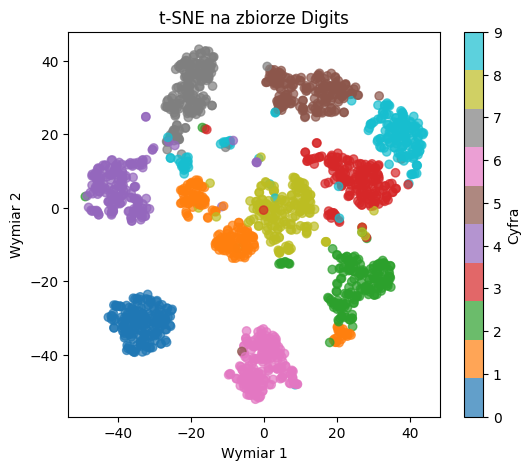

In [11]:

from sklearn.manifold import TSNE

# Wczytanie (ponownie) zbioru Digits i standaryzacja
digits = load_digits()
X_digits = StandardScaler().fit_transform(digits.data)
y_digits = digits.target

# t-SNE do 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=0)  # ustawiamy random_state dla powtarzalnego wyniku
X_tsne_2D = tsne.fit_transform(X_digits)

# Wizualizacja
plt.figure(figsize=(6,5))
scatter = plt.scatter(X_tsne_2D[:, 0], X_tsne_2D[:, 1], c=y_digits, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label="Cyfra")
plt.title("t-SNE na zbiorze Digits")
plt.xlabel("Wymiar 1")
plt.ylabel("Wymiar 2")
plt.show()




Po uruchomieniu powyższego kodu, otrzymamy wykres punktowy t-SNE dla cyfr. Możemy oczekiwać, że punkty ułożą się w **10 wyraźnych klastrów**, z których każdy odpowiada jednej cyfrze (0–9). Rzeczywiście, typowy wynik wygląda następująco:

*Wizualizacja zbioru Digits za pomocą t-SNE (500 losowych próbek). Punkty ułożyły się w klastry odpowiadające poszczególnym cyfrom 0–9.* Widzimy, że t-SNE zdołało rozdzielić dane znacznie lepiej niż PCA w 2D – każda cyfra tworzy osobne skupisko punktów. Na przykład, czerwone punkty (cyfra 0) są zgrupowane razem (prawy dół na wykresie), czarne punkty (cyfra 5) tworzą osobny klaster po prawej, zielone (cyfra 2) u góry, fioletowe (cyfra 9) po lewej, itd. Istnieje kilka względnie bliższych sobie klastrów – np. cyfry 4 i 9 mogą być trochę bliżej, co ma sens, bo wizualnie 4 i 9 mogą być trudniejsze do odróżnienia przez model, podobnie 3 i 8 (kolory fioletowy i pomarańczowy) są gdzieś niedaleko siebie. Mimo to, separacja jest wyraźna.



Ta poprawa wynika z faktu, że **t-SNE zachował nieliniową strukturę danych** – w oryginalnych 64 wymiarach zapewne istniały grupy podobnych obrazków cyfr, ale były ułożone w złożony sposób, którego PCA nie umiało uchwycić liniowo. t-SNE zaś optymalnie rozmieścił punkty na płaszczyźnie, klasteryzując podobne obrazy. Warto przy tym podkreślić, że **t-SNE nie „znało” etykiet cyfr** – grupowanie wynikło samo z siebie, co jest bardzo cennym narzędziem eksploracji danych: możemy odkryć naturalnie występujące klastry (np. różne typy zachowań, grupy klientów, gatunki w biologii itp.) bez podania tych informacji algorytmowi.


**Oś czasu i powtarzalność:** Gdy uruchomisz t-SNE kilkukrotnie, możesz zauważyć drobne różnice w układzie klastrów. Możesz ustawić parametr `random_state` dla spójności. Kluczowe jest, że *relacje wewnątrz klas* pozostaną – klaster np. cyfr 1 zawsze będzie klastrem, choć może pojawić się w innym miejscu wykresu za kolejnym uruchomieniem (np. raz z lewej, raz u góry). Można sobie wyobrazić, że wynik t-SNE można poddać dowolnej rotacji czy odbiciu, a nadal jest równie poprawny – dlatego nie należy interpretować absolutnych położeń, tylko układ względny.



### 3.3 Eksperymentowanie z parametrem *perplexity*

Wspomnieliśmy o parametrze **perplexity**, który wpływa na sposób, w jaki t-SNE patrzy na „lokalność” sąsiedztwa. Warto zobaczyć, jak zmiana tego parametru wpływa na wynikową wizualizację. Ogólnie:




* **Niższa perplexity** (np. 5) sprawi, że algorytm skupi się na bardzo małych, lokalnych grupkach. To może spowodować, że w wyniku otrzymamy wiele małych klastrów, czasem nawet porozrywanych (może algorytm potraktować część jednego naturalnego klastra jako osobne grupki).


* **Wyższa perplexity** (np. 50) włączy do rozważań szerszy kontekst – punkty będą układać się bardziej globalnie. Klastery mogą być większe i bardziej rozciągnięte, bo algorytm stara się utrzymać również pewne relacje globalne.

Spróbujmy dla zbioru Digits przećwiczyć kilka wartości perplexity i zobaczyć różnice. (Uwaga: t-SNE jest stosunkowo wolne, więc wykonanie kilku osadzeń może chwilę potrwać). Poniższy kod można uruchomić i zmienić wartość `perplexity`:

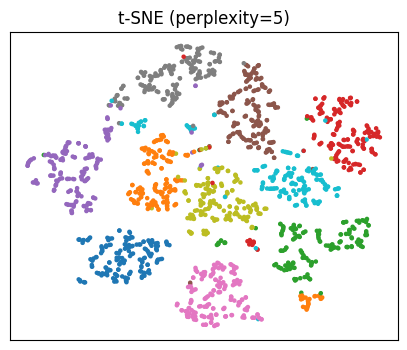

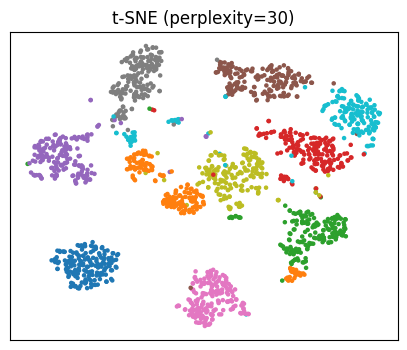

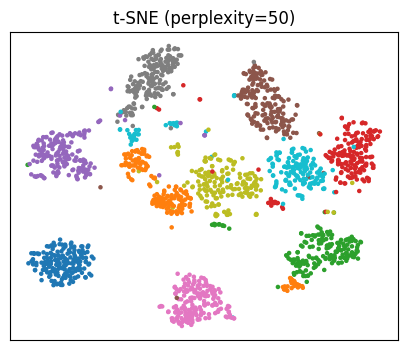

In [12]:
for perp in [5, 30, 50]:
    tsne = TSNE(n_components=2, perplexity=perp, random_state=0)
    X_tsne = tsne.fit_transform(X_digits)  # używamy całego zbioru lub jego części
    plt.figure(figsize=(5,4))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_digits, cmap='tab10', s=5)
    plt.title(f"t-SNE (perplexity={perp})")
    plt.xticks([]); plt.yticks([])
    plt.show()



Po wykonaniu powyższego bloku (być może ograniczając się do np. 1000 próbek dla szybkości), zaobserwuj:

* Dla `perplexity=5` – otrzymane klastry mogą być bardzo gęste, ale czasem mogą się podzielić. Algorytm w skrajnym przypadku może rozbić jedną naturalną grupę na parę mniejszych.
* Dla `perplexity=30` (wartość domyślna, już widzieliśmy efekt).
* Dla `perplexity=50` – klastry mogą być bardziej „rozmyte” lub kilka klastrów, które wcześniej były osobno, mogą się znaleźć bliżej siebie lub połączyć w większą strukturę, jeżeli globalna struktura sugeruje ich powiązanie.

Wybór perplexity bywa kwestią prób i zależy od danych – zaleca się testować kilka wartości. Często w literaturze prezentuje się wykresy dla kilku perplexities obok siebie dla pełniejszego obrazu.



### 3.4 Przykład: t-SNE dla danych tekstowych (20 Newsgroups)

Zademonstrujmy użycie t-SNE na innym typie danych – dokumentach tekstowych. Wykorzystamy część zbioru **20 Newsgroups**, który zawiera posty z grup dyskusyjnych pogrupowane tematycznie (20 różnych tematów). Wybierzemy kilka z tych tematów, przekształcimy dokumenty na wektory TF-IDF (co da wysokowymiarowe reprezentacje, rzędu tysięcy wymiarów), a następnie zastosujemy t-SNE do wizualizacji w 2D. Zobaczymy, czy dokumenty z tego samego tematu utworzą klastry.


**Kroki:**

1. Pobranie dokumentów z wybranych 4 kategorii (np. `comp.graphics`, `rec.sport.hockey`, `sci.space`, `talk.religion.misc`).
2. Przekształcenie tekstów na cechy TF-IDF (ograniczymy `max_features=1000` dla szybkości).
3. (Opcjonalnie) redukcja PCA do np. 50 wymiarów wstępnie – to przyspieszy t-SNE.
4. Uruchomienie t-SNE i wizualizacja punktów w 2D, kolorowanych wg kategorii dokumentu.


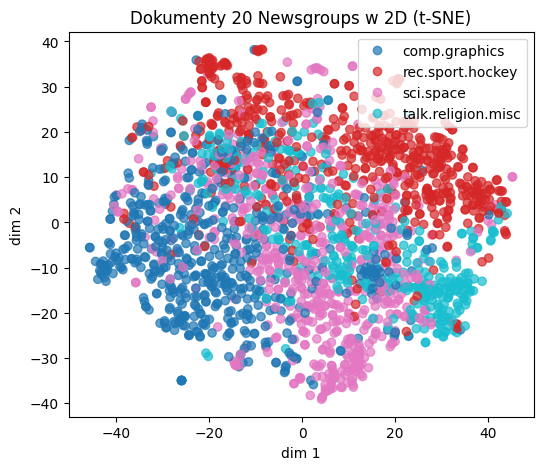

In [13]:

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Pobranie danych z 4 kategorii
categories = ['comp.graphics', 'rec.sport.hockey', 'sci.space', 'talk.religion.misc']
newsgroups = fetch_20newsgroups(subset='train', categories=categories,
                                remove=('headers','footers','quotes'))  # usuwamy nagłówki/stopki by skupić się na treści
X_text = newsgroups.data
y_text = newsgroups.target  # etykiety 0-3 odpowiadają kolejności kategorii w liście categories

# 2. TF-IDF wektorowanie tekstu
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(X_text)

# 3. Wstępna redukcja PCA do 50 wymiarów (bo 1000 wymiarów może być wolne dla t-SNE)
X_tfidf_dense = X_tfidf.toarray()  # konwersja do tablicy numpy
X_pca50 = PCA(n_components=50).fit_transform(X_tfidf_dense)

# 4. t-SNE na zredukowanych danych
tsne = TSNE(n_components=2, perplexity=40, random_state=0)
X_text_tsne = tsne.fit_transform(X_pca50)

# Wizualizacja
plt.figure(figsize=(6,5))
scatter = plt.scatter(X_text_tsne[:,0], X_text_tsne[:,1], c=y_text, cmap='tab10', alpha=0.7)
plt.title("Dokumenty 20 Newsgroups w 2D (t-SNE)")
plt.xlabel("dim 1"); plt.ylabel("dim 2")
# Dodanie legendy z nazwami kategorii:
handles, _ = scatter.legend_elements()
plt.legend(handles, categories)
plt.show()

Jeśli wszystko się powiodło, powinniśmy otrzymać wykres punktów reprezentujących dokumenty. Dokumenty z tych samych grup tematycznych zapewne będą blisko siebie. Przykładowo, posty z grupy `rec.sport.hockey`  zgrupują się, oddzielone od postów z `talk.religion.misc`. Tematy `comp.graphics`  i `sci.space` też powinny utworzyć własne skupiska, choć możliwe, że `sci.space` i `comp.graphics` znajdą się bliżej siebie (oba techniczne), a `religion` i `hockey` dalej. Taki rezultat pokazuje, że **t-SNE potrafi odzwierciedlić tematyczną strukturę dokumentów**, redukując bardzo wielowymiarowe dane tekstowe do łatwo interpretowalnego wykresu 2D.

*(Jeśli wyniki nie są zadowalające, spróbuj zmienić parametry: np. inną kombinację kategorii, wartość perplexity, itp. Zawsze istnieje element prób w dostrajaniu t-SNE.)*



### 3.5 Ćwiczenia do samodzielnego wykonania (t-SNE)

1. **Różne perplexity:** Powtórz eksperyment z wartością parametru *perplexity* dla wybranego zbioru danych (np. Digits, jak powyżej, lub innego zbioru, np. Iris czy Wine) i porównaj uzyskane wizualizacje. Narysuj obok siebie wykresy dla perplexity = 5, 30, 50 (lub innych wartości) i opisz, czym się różnią. Która wartość wydaje Ci się najlepiej oddawać strukturę danych?
2. **t-SNE na własnym zbiorze danych:** Zastosuj t-SNE do dowolnego zbioru wysokowymiarowych danych, który Cię interesuje. To może być zbiór obrazów, sygnałów, danych biologicznych, finansowych – cokolwiek, co ma dużo cech. Przykładowe pomysły:

   * Dane sensorów z urządzenia IoT (np. zestaw danych z przyspieszeniomierza, gdzie próbki to różne aktywności – jak *Human Activity Recognition* dostępny na UCI/OpenML).
   * Dane genetyczne – np. poziomy ekspresji genów dla różnych typów komórek czy warunków eksperymentalnych.
   * Duży zbiór obrazów (być może zredukowanych wstępnie, np. do wektorów cech CNN) – t-SNE bywa używane do wizualizacji przestrzeni obrazów.
   * Jeżeli masz bardzo duży zbiór, rozważ losowe pobranie podzbioru (np. 1000 próbek), by czas obliczeń był rozsądny.

   Po wykonaniu osadzenia t-SNE, spróbuj zinterpretować powstały wykres: czy widać naturalne skupiska? Spróbuj dowiedzieć się, co mogą oznaczać (czy pokrywają się z jakimiś znanymi kategoriami, klasami lub cechami szczególnymi danych).
3. **Porównanie z innymi metodami:** (Bardziej otwarte zadanie) Porównaj rezultaty t-SNE z PCA lub LDA na tych samych danych. Na przykład, dla zbioru Digits mieliśmy okazję to zrobić – t-SNE vs PCA. Możesz spróbować dla swoich danych: np. zobacz jak PCA 2D przedstawia dane vs t-SNE 2D. Inną ciekawą metodą jest **UMAP** (Uniform Manifold Approximation and Projection) – nowsza metoda nieliniowej redukcji wymiaru, często dająca podobne wyniki do t-SNE, ale szybciej. Jeśli masz możliwość, spróbuj zainstalować bibliotekę `umap-learn` i użyć `UMAP(n_neighbors=..., min_dist=..., n_components=2)` do analogicznej wizualizacji. Porównaj z t-SNE – czy widzisz różnice w układzie klastrów? (UMAP stara się zachować nieco więcej globalnej struktury, więc odległości między klastrami czasem są bardziej znaczące niż w t-SNE).
4. **Eksperyment z parametrami t-SNE:** t-SNE ma też inne parametry oprócz perplexity, np. *learning\_rate*, *early\_exaggeration*, *init*. Przeczytaj dokumentację scikit-learn lub artykuł van der Maaten & Hinton (2008) i spróbuj pobawić się tymi parametrami na wybranym zbiorze. Na przykład, zobacz co się stanie, gdy użyjesz `init='pca'` (inicjalizacja PCA zamiast domyślnej losowej) – to czasem przyspiesza zbieżność. Zwiększenie *learning\_rate* może sprawić, że punkty szybciej się przemieszczają na początku – ale zbyt duże może zdestabilizować optymalizację. Te zabawy pomogą Ci zrozumieć czułość t-SNE na hiperparametry.



## Podsumowanie

Przyjrzeliśmy się trzem technikom redukcji wymiarowości, ich teorii i zastosowaniom praktycznym:

* **PCA (Principal Component Analysis):** Metoda nienadzorowana, liniowa. Znajduje składowe główne – nowe cechy będące kombinacjami oryginalnych – które maksymalizują wariancję danych. Użyteczna do kompresji danych i wstępnego przetwarzania. Nie wykorzystuje etykiet, więc nie gwarantuje separacji klas, ale zachowuje jak najwięcej informacji ogólnej. Kluczowe pojęcie: *wariancja wyjaśniona* – pomaga zdecydować, ile składowych zachować. Pamiętaj o skalowaniu cech przed PCA.
* **LDA (Linear Discriminant Analysis):** Metoda nadzorowana, liniowa. Znajduje takie kombinacje cech, które najlepiej rozróżniają znane klasy (maksymalizuje wariancję między klasami, minimalizuje wewnątrz klas). Może zredukować wymiar do (C-1) przy C klasach. Dobra do wizualizacji danych z etykietami i jako preprocessing pod klasyfikację. Widzieliśmy, że LDA wygrywa z PCA w zadaniu rozdzielenia klas (np. Iris, Wine). Wymaga ostrożności przy bardzo wysokim wymiarze (potrzeba regularzacji lub PCA przed LDA).
* **t-SNE (t-distributed Stochastic Neighbor Embedding):** Metoda nienadzorowana, nieliniowa. Szczególnie przydatna do wizualizacji danych w 2D/3D, gdy interesuje nas struktura klastrowa. Zachowuje relacje lokalne – punkty podobne pozostają blisko. Pozwala odkryć naturalne grupy w danych (np. różne cyfry, tematy dokumentów) bez użycia etykiet. Jest jednak trudniejsza do skalibrowania (hiperparametry jak *perplexity*), wyniki są nie-deterministyczne (losowa inicjalizacja) i nie ma bezpośredniej interpretacji składowych ani łatwego transformowania nowych punktów. Traktuj t-SNE jako narzędzie eksploracji i wizualizacji, a nie uniwersalną metodę redukcji wymiaru do dalszego modelowania (chyba że celem modelowania jest np. klasteryzacja, wtedy można na podstawie t-SNE wywnioskować strukturę, ale do trenowania modelu użyć jednak oryginalnych cech lub PCA).




**Kiedy której metody użyć?**

* Jeśli masz **dane z etykietami** i chcesz obniżyć wymiarowość, by np. wizualizować lub przygotować cechy dla modelu – rozważ LDA (o ile liczba docelowych wymiarów ≤ C-1). LDA pomoże Ci zobaczyć, czy klasy są liniowo rozdzielalne. Możesz też użyć PCA, by zobaczyć ogólną strukturę danych (czasem może ujawnić np. obecność osobnych podgrup w obrębie jednej klasy, których LDA z definicji nie pokaże, bo skupi się na różnicach między klasami globalnie).
* Dla **danych bez etykiet (uczenie nienadzorowane)** – PCA jest dobrym pierwszym krokiem (łatwo policzyć, zrozumieć wariancje, itp.). Jeśli podejrzewasz, że struktura jest nieliniowa lub chcesz wizualizować dane, użyj t-SNE (lub pokrewnych metod jak UMAP) do zerknięcia, czy istnieją skupiska lub inne wzorce.
* Gdy celem jest **przyspieszenie modelu lub zmniejszenie wymiaru** ze względu na koszty: PCA jest często wybierane jako szybka metoda redukcji wymiarów przed właściwym algorytmem (np. przed klasteryzacją czy innym algorytmem nienadzorowanym). Należy jednak pamiętać, że może „schować” pewne struktury – np. dla danych zawierających klasy mieszające się nieliniowo PCA nie rozdzieli ich, ale jeśli i tak używamy później metody nienadzorowanej (np. k-means), to i k-means by ich nie rozdzielił.
* **Łączenie metod:** Jak wspomniano, można łączyć metody – np. PCA wstępnie (dla redukcji szumu, wymiaru) + t-SNE do wizualizacji (jest to wręcz zalecane dla bardzo wysokich wymiarów). Albo PCA + LDA (PCA redukuje wymiar do czegoś rozsądnego jeśli cech >> próbek, a LDA dalej robi swoje do C-1 wymiarów).

Na koniec, warto pamiętać że redukcja wymiaru, choć potężna, to jednak jest **utratą informacji**. Zawsze miej na uwadze, co poświęcasz, redukując cechy, i czy to jest akceptowalne dla Twojego celu. W przypadku wizualizacji 2D jest to konieczne (bo inaczej nie zwizualizujemy), ale np. budując model klasyfikacyjny, czasem lepiej zostawić oryginalne cechy dla maksymalnej informacji (chyba że występuje przetrenowanie, wtedy redukcja wymiarów może pomóc).



## Quiz – Sprawdź swoją wiedzę

Oto kilka pytań kontrolnych oraz punktów do przemyślenia. Spróbuj na nie odpowiedzieć własnymi słowami:

1. **PCA:** Co robi PCA i jak definiowane są składowe główne? Dlaczego przed zastosowaniem PCA często trzeba przeskalować (standaryzować) cechy?
2. Jak interpretować tzw. *wariancję wyjaśnioną*? Załóżmy, że pierwsze dwie składowe PCA wyjaśniają 80% wariancji danych. Co to dokładnie oznacza?
3. Masz dane 1000-obserwacji i 50-cech, bez etykiet. Chcesz zredukować wymiar do 2 i zobaczyć, czy pojawią się jakieś wzorce/grupy. Której metody użyjesz i dlaczego: PCA czy t-SNE? (Co potencjalnie pokaże każda z nich?)
4. **LDA vs PCA:** Wymień główne różnice między PCA a LDA. W jakiej sytuacji LDA może dać gorsze wyniki od PCA mimo posiadania informacji o klasach?
5. Dlaczego w LDA maksymalna liczba uzyskiwanych komponentów to (C-1)? Co by się stało, gdybyśmy próbowali znaleźć więcej komponentów niż to ograniczenie?
6. **t-SNE parametry:** Czym jest *perplexity* w t-SNE i jaki ma wpływ na wyniki? Co się stanie, gdy ustawimy bardzo małą lub bardzo dużą wartość?
7. Czy odległości między klastrami w wyniku t-SNE mogą być interpretowane tak samo jak w oryginalnych danych? (Np. jeśli dwa klastry są daleko od siebie na wykresie t-SNE, czy to znaczy, że w oryginalnych danych te dwie grupy były najbardziej odległe?)
8. Wyjaśnij krótko, dlaczego t-SNE nie nadaje się bezpośrednio do redukcji wymiarowości przed uczeniem modelu predykcyjnego (np. przed klasyfikatorem), a PCA jak najbardziej.
9. **Praktyka:** Załóżmy, że po zredukowaniu wymiarów (dowolną metodą) i zwizualizowaniu, nie widzisz żadnych wyraźnych klastrów ani struktur – punkty wydają się rozmieszczone losowo. Jakie mogą być tego przyczyny? Wymień przynajmniej dwie (np. dotyczące danych lub metody). Co byś zrobił, by dalej analizować dane?
10. **Otwarte:** Wybierz dowolny zbiór danych i zastosuj poznane metody redukcji wymiarowości. Opisz krótko wyniki: ile wymiarów udało Ci się zredukować bez znacznej utraty informacji? Czy wizualizacja ujawniła coś ciekawego? Czego się dowiedziałeś o danych z tych eksperymentów?

